In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader

import sys, os
sys.path.append('..')
DATADIR = "../data/hiragana73"

from generator import *
from discriminator import *
from trainer import *
from hiragana_dataset import make_hiragana_dataset

In [2]:
import sys
sys.setrecursionlimit(10**7) #再帰回数の上限変更

In [3]:
img_size = 48

plotline = PlotLine2(img_size)

In [4]:
train_dataset, valid_dataset = make_hiragana_dataset(DATADIR, CATEGORIES=['a'])
# バッチサイズの指定
batch_size = 1
# DataLoaderを作成
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# 動作確認
# イテレータに変換
batch_iterator = iter(train_dataloader)

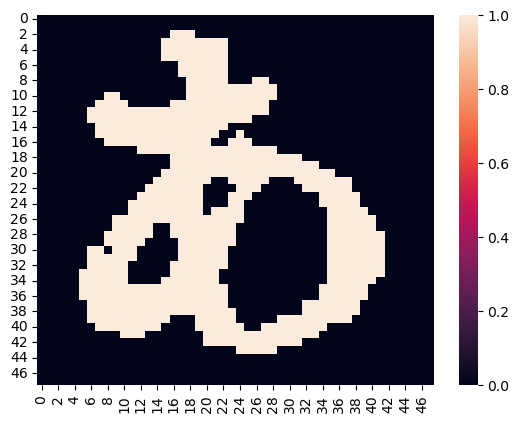

In [5]:
# 1番目の要素を取り出す
inputs, labels = next(batch_iterator)
sns.heatmap(labels.detach().numpy()[0])
plt.show()

In [11]:
gen8 = Generator8(w_m=0., w_M=4.)
# disc7 = Discriminator7(img_size)
disc3 = Discriminator3(img_size)

In [12]:
#losses, errors, distances = train1(gen8, disc3, inputs, labels, iteration=4000, lr=0.1) <--これで「あ」は書ける
#losses, errors, distances = train1_schedule(gen8, disc3, inputs, labels, iteration=4000, start_factor=0.1, end_factor=0.05, total_iters=20)
losses, errors, distances = train1_schedule5(
    gen8, disc3, inputs, labels, 
    iteration=4000, start_factor=0.1, end_factor=0.8, total_iters=40, 
    start_p=0.5, alpha=400, beta=50
)
# iteration=4000, start_factor=0.1, end_factor=0.01, total_iters=30,

using: cpu
split: False
iter: 0, loss: 17259.025390625
iter: 100, loss: 16057.37109375
iter: 200, loss: 7719.61572265625
iter: 300, loss: 6889.2841796875
iter: 400, loss: 7128.93798828125
iter: 500, loss: 8457.4580078125
iter: 600, loss: 6519.93115234375
iter: 700, loss: 5263.404296875
iter: 800, loss: 5060.34033203125
iter: 900, loss: 4631.59033203125
iter: 1000, loss: 5982.98193359375
iter: 1100, loss: 5150.87890625
iter: 1200, loss: 6704.517578125
iter: 1300, loss: 6987.39697265625
iter: 1400, loss: 5479.19970703125
iter: 1500, loss: 4288.064453125
iter: 1600, loss: 4650.51953125
iter: 1700, loss: 4077.583740234375
iter: 1800, loss: 3474.127685546875
iter: 1900, loss: 4424.5673828125
iter: 2000, loss: 4295.4970703125
iter: 2100, loss: 3116.59814453125
iter: 2200, loss: 4272.236328125
iter: 2300, loss: 2903.59814453125
iter: 2400, loss: 3316.15185546875
iter: 2500, loss: 2824.45849609375
iter: 2600, loss: 2612.62548828125
iter: 2700, loss: 1706.142822265625
iter: 2800, loss: 2051.292

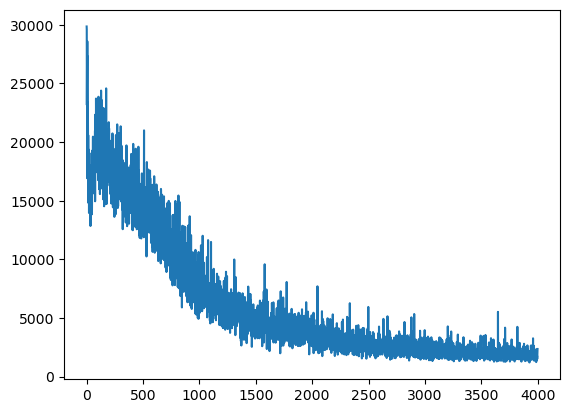

In [8]:
plt.plot(losses)

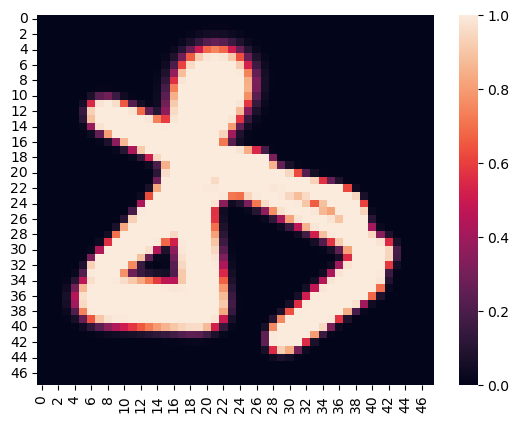

In [9]:
xyw = gen8(inputs)
line = plotline(xyw)
sns.heatmap(line.detach().numpy()[0])
plt.show()

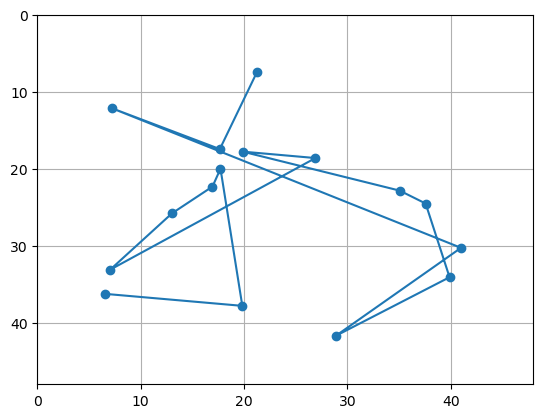

In [10]:
xy = xyw.detach().numpy()[0, :, 0:2]

fig, ax = plt.subplots(1,1)
ax.set_xlim(0, 48)
ax.set_ylim(0, 48)
ax.invert_yaxis()
ax.grid()
ax.plot(xy[:, 1], xy[:, 0], marker='o')
plt.show()